In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import nltk as nl
#nl.download('vader_lexicon')
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
import sys,csv,re

In [2]:
df = pd.read_csv("kindle_reviews.csv")

df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [3]:
df.isna().sum()

Unnamed: 0           0
asin                 0
helpful              0
overall              0
reviewText          22
reviewTime           0
reviewerID           0
reviewerName      3816
summary              1
unixReviewTime       0
dtype: int64

In [4]:
df['reviewText'] = df['reviewText'] + ' ' + df['summary']
del df['summary']

In [5]:
df['reviewText'].fillna("",inplace = True)

In [6]:
df.isna().sum()

Unnamed: 0           0
asin                 0
helpful              0
overall              0
reviewText           0
reviewTime           0
reviewerID           0
reviewerName      3816
unixReviewTime       0
dtype: int64

In [7]:
df["reviewTime"] = pd.to_datetime(df["reviewTime"])

In [8]:
df['positive/negative'] = ['positive' if x > 3 else 'negative' for x in df.overall]

In [9]:
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,unixReviewTime,positive/negative
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,1399248000,positive
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,1388966400,positive
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,2014-04-04,A795DMNCJILA6,dot,1396569600,positive
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",1392768000,positive
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,1395187200,positive


In [35]:
# Export Cleaned Kindle data
df.head()
df.to_csv('kindle_timeseries.csv')

<AxesSubplot:>

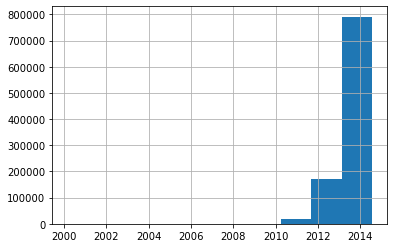

In [10]:
df['reviewTime'].hist()

In [11]:
plt.bar(df['reviewTime'], df['positive/negative'])
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000225E3BD9DC0> (for post_execute):


KeyboardInterrupt: 